# 07TestCOVID19

# Libraries

In [75]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime

from IPython.display import display

# Load Data

In [76]:
test = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\test.csv", parse_dates =["date"], index_col ="date")

# Size

In [77]:
test.shape

(163, 6)

# Missing Data

In [78]:
test.isna().sum()

time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

# Data Types

In [79]:
test.dtypes

time         int64
test         int64
negative     int64
confirmed    int64
released     int64
deceased     int64
dtype: object

# Delete Unneeded Columns

In [80]:
test = test.drop(["time", "released", "test", "negative", "deceased"], axis=1)

# Rename Columns

In [81]:
test.rename(
    columns={
        "confirmed": "Confirmed"  
    },
    inplace=True,
)
test.index.names = ['Date']

# The First Five Rows

In [82]:
test.head()

,Confirmed
Date,
2020-01-20,1
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2


In [83]:
# test = test.asfreq(freq='W')
# test = test.reset_index()
# # test['Month'] = test['Date'].dt.strftime('%B')
# test

In [84]:
test['Count'] = test['Confirmed'].diff().fillna(0)
test

,Confirmed,Count
Date,,
2020-01-20,1,0.0
2020-01-21,1,0.0
2020-01-22,1,0.0
2020-01-23,1,0.0
2020-01-24,2,1.0
...,...,...
2020-06-26,12602,39.0
2020-06-27,12653,51.0
2020-06-28,12715,62.0


In [85]:
test.drop('Confirmed', inplace = True, axis = 1)
test

,Count
Date,
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
...,...
2020-06-26,39.0
2020-06-27,51.0
2020-06-28,62.0


# Visualizations

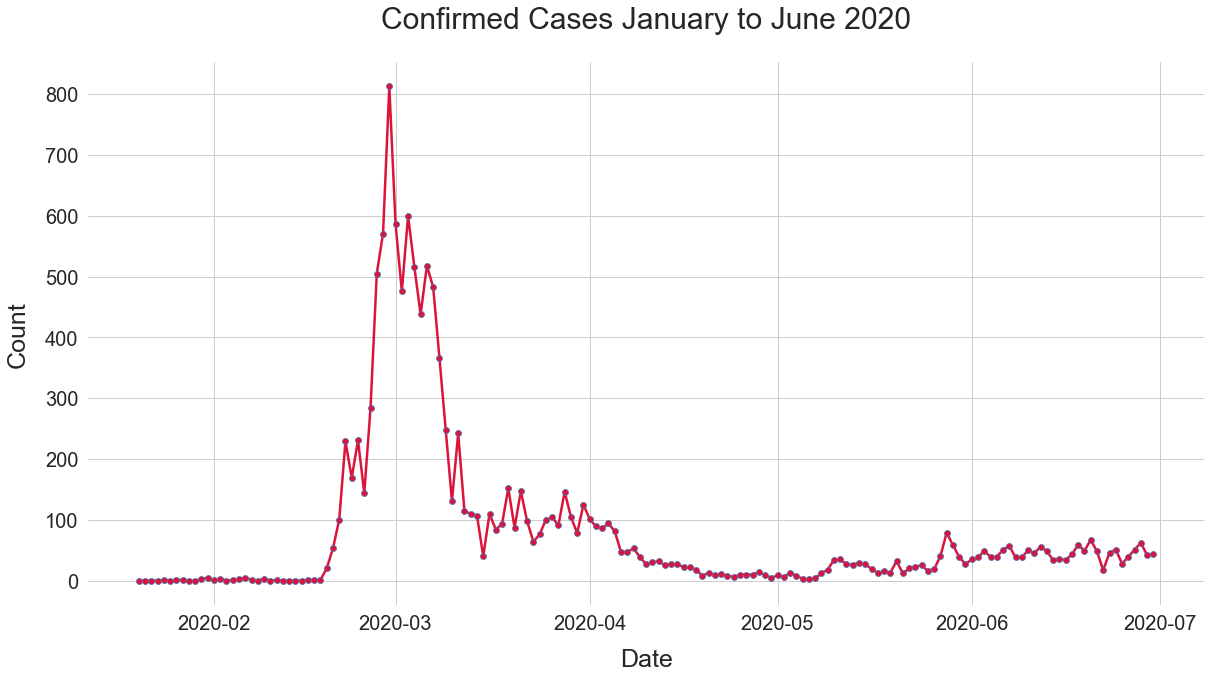

In [61]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.lineplot(
    x="Date",
    y="Count",
    data=test,
    marker="o",
    markeredgecolor="b",
    color="crimson",
    linewidth=2.5,
    markers=True,
)

plt.xlabel("Date", fontsize=25, labelpad=15)
plt.ylabel("Count", fontsize=25, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Confirmed Cases January to June 2020", fontsize=30, y=1.05)

# for x, y in zip(test["Date"], test["Count"]):
#     plt.text(x=x, y=y - 350, s="{:.0f}".format(y), color="black")

sns.despine(left=True, bottom=True)

plt.show()

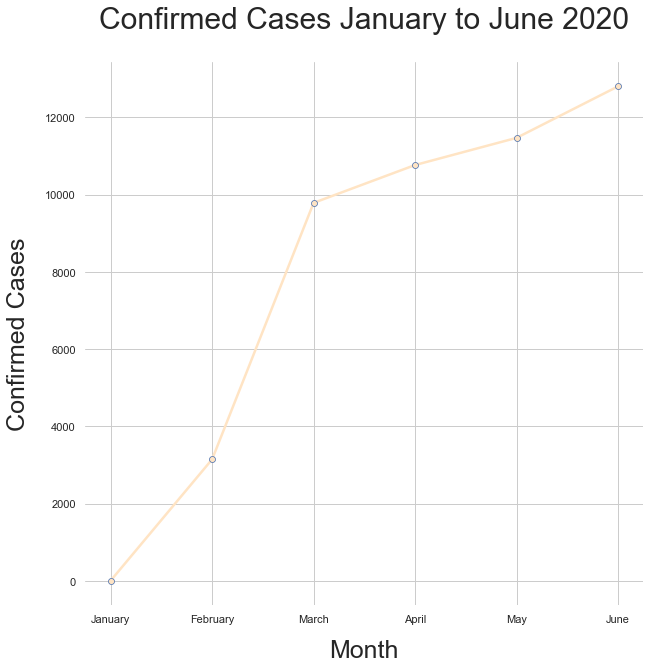

In [18]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
# sns.set_context("paper", font_scale=2.0)

sns.lineplot(x="Month", y="Confirmed", data=test, marker='o', markeredgecolor='b', color="bisque", linewidth=2.5)

plt.xlabel("Month", fontsize=25, labelpad=15)
plt.ylabel("Confirmed Cases", fontsize=25, labelpad=15)

plt.title("Confirmed Cases January to June 2020", fontsize=30, y=1.05)
sns.despine(left=True, bottom=True)